# **1.LOAD AND READ DATASET**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV, SGDClassifier, RidgeClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import svm, linear_model
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Read the uploaded dataset
dr=pd.read_csv('/content/drive/MyDrive/cancer dataset/Death.csv')

**DATA EXPLORATION**

In [8]:
#Dimension of the dataset
dr.shape

(3140, 11)

In [9]:
#To display the first 5 values of the dataset
dr.head()

,index,County,FIPS,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,1,Perry County Kentucky,21193,125.6,108.9,144.2,18,stable,-0.6,-2.7,1.6
1,2,Powell County Kentucky,21197,125.3,100.2,155.1,5,stable,1.7,0.0,3.4
2,3,North Slope Borough Alaska,2185,124.9,73.0,194.7,8,**,2.0,2.0,2.0
3,4,Owsley County Kentucky,21189,118.5,83.1,165.5,19,stable,2.2,-0.4,4.8
4,5,Union County Florida,12125,113.5,89.9,141.4,22,falling,-2.2,-4.3,0.0


In [10]:
#Information about the dataset 
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         3140 non-null   int64  
 1   County                                        3140 non-null   object 
 2   FIPS                                          3140 non-null   int64  
 3   Age-Adjusted Death Rate                       3140 non-null   float64
 4   Lower 95% Confidence Interval for Death Rate  3140 non-null   float64
 5   Upper 95% Confidence Interval for Death Rate  3140 non-null   float64
 6   Average Deaths per Year                       3140 non-null   int64  
 7   Recent Trend                                  3140 non-null   object 
 8   Recent 5-Year Trend in Death Rates            3140 non-null   float64
 9   Lower 95% Confidence Interval for Trend       3140 non-null   f

In [11]:
#Descriptive statistics of the dataset 
dr.describe()

,index,FIPS,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1570.500000,30401.960828,47.736242,38.402197,59.457962,47.357006,-0.584745,-2.087866,1.001242
std,906.584249,15150.904099,20.767306,17.341848,26.629216,95.138622,2.426678,3.588188,2.906804
min,1.000000,1001.000000,1.000000,1.000000,1.000000,1.000000,-33.400000,-60.900000,-10.300000
25%,785.750000,18180.500000,40.075000,30.500000,48.900000,8.000000,-1.400000,-2.800000,-0.100000
50%,1570.500000,29178.000000,50.600000,40.900000,61.900000,18.000000,-0.600000,-1.900000,0.900000
75%,2355.250000,45081.500000,59.900000,49.700000,75.100000,42.000000,0.500000,-1.000000,2.000000
max,3140.000000,56045.000000,125.600000,108.900000,194.700000,979.000000,31.100000,6.900000,78.100000


In [12]:
#To determine the datatypes of all the columns
dr.dtypes

index                                             int64
County                                           object
FIPS                                              int64
Age-Adjusted Death Rate                         float64
Lower 95% Confidence Interval for Death Rate    float64
Upper 95% Confidence Interval for Death Rate    float64
Average Deaths per Year                           int64
Recent Trend                                     object
Recent 5-Year Trend in Death Rates              float64
Lower 95% Confidence Interval for Trend         float64
Upper 95% Confidence Interval for Trend         float64
dtype: object

In [13]:
#To determine the datatype of all the columns along with null value count and unique value count
temp=pd.DataFrame(index=dr.columns)
temp['data_types']=dr.dtypes
temp['null_values']=dr.isnull().sum()
temp['unique_count']=dr.nunique()
temp

,data_types,null_values,unique_count
index,int64,0,3140
County,object,0,3140
FIPS,int64,0,3140
Age-Adjusted Death Rate,float64,0,618
Lower 95% Confidence Interval for Death Rate,float64,0,571
Upper 95% Confidence Interval for Death Rate,float64,0,767
Average Deaths per Year,int64,0,302
Recent Trend,object,0,5
Recent 5-Year Trend in Death Rates,float64,0,147
Lower 95% Confidence Interval for Trend,float64,0,154


# 2 PERFORM BELOW VISUALIZATIONS
*   Univariate Analysis
*   Bi-variate Analysis
*   Multi-variate Analysis

**UNIVARIATE ANALYSIS**

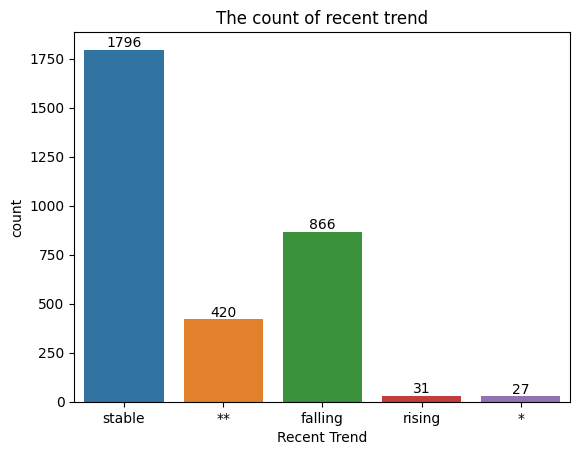

In [14]:
#CountPlot
count=sns.countplot(x=dr['Recent Trend'],data=dr)
for i in count.containers:
    count.bar_label(i)
plt.title("The count of recent trend")
plt.show()

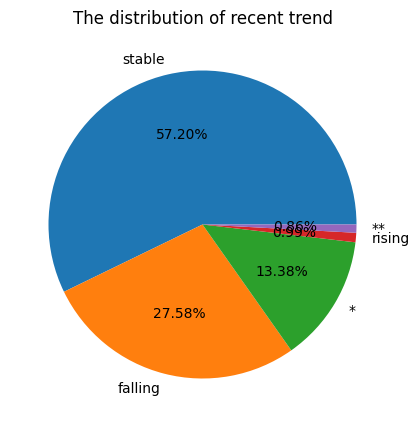

In [15]:
#PieChart
plt.figure(figsize=(10,5))
plt.pie(dr['Recent Trend'].value_counts().values,
        labels=['stable','falling','*','rising','**'],autopct='%1.2f%%')
plt.title("The distribution of recent trend")
plt.show()

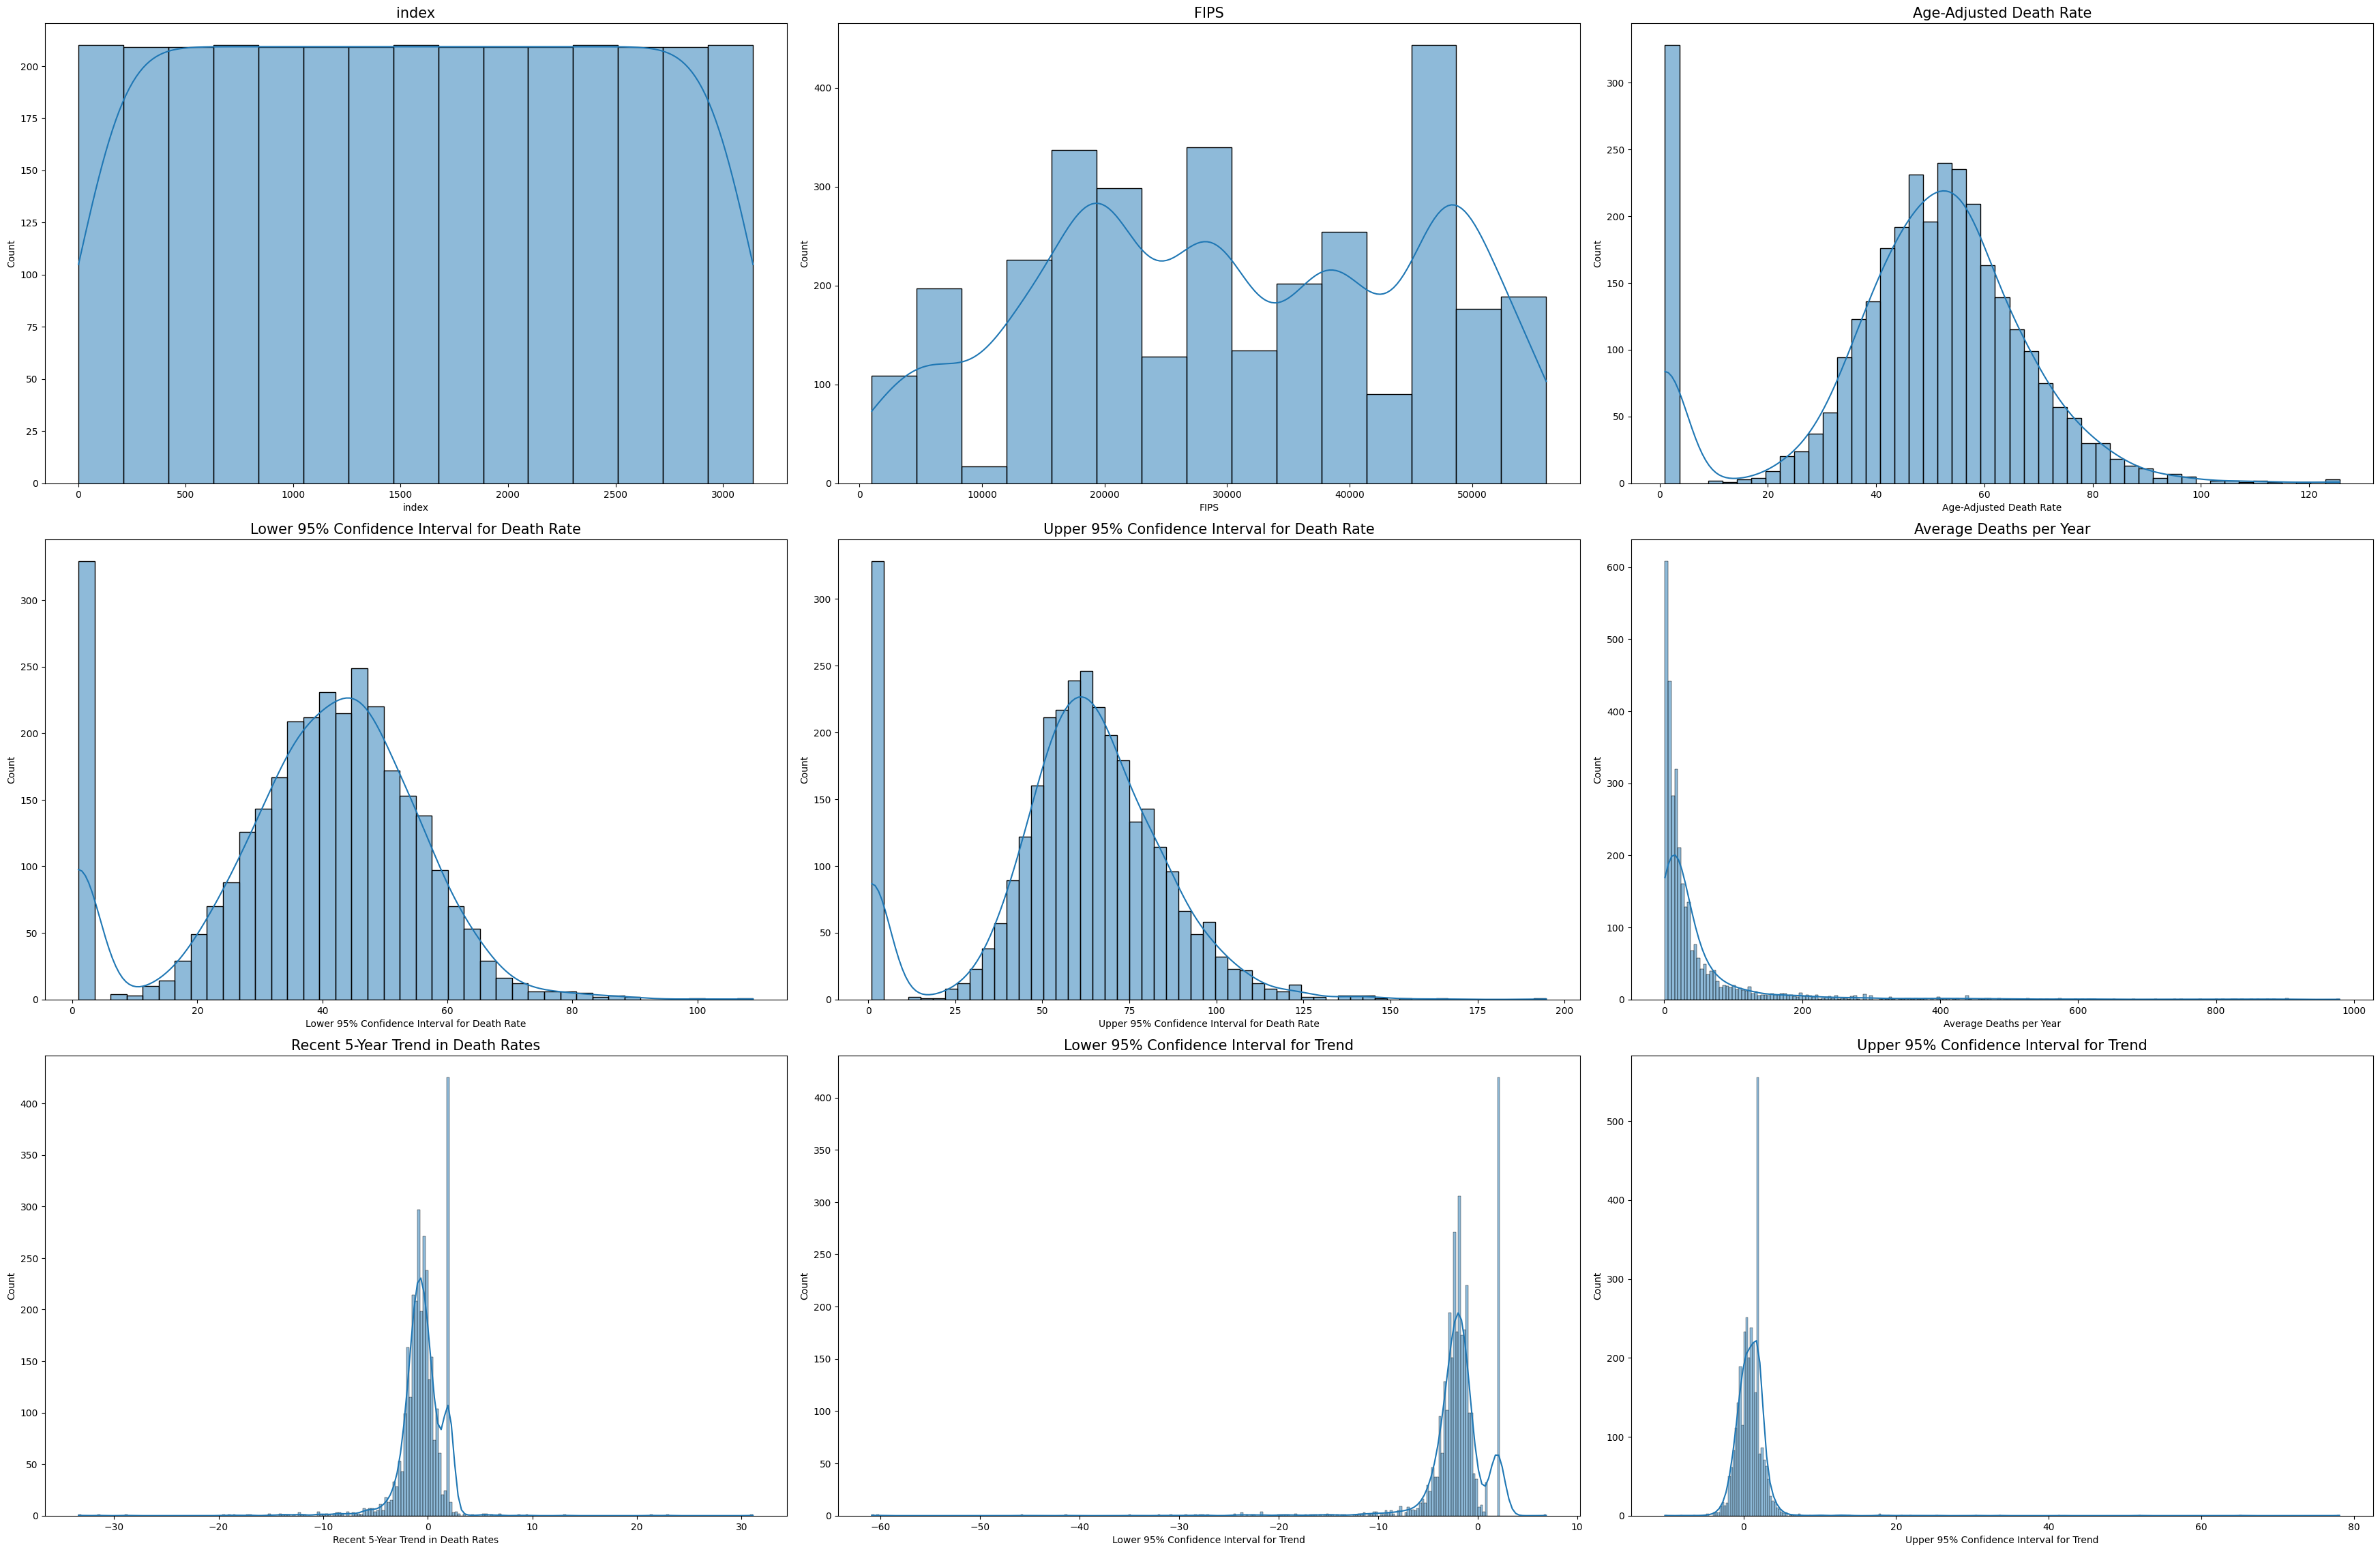

In [16]:
#CountPlot for all numerical columns
plt.figure(figsize=(35,30))
for i,col in enumerate(dr.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(4,3,i)
    plt.title(f"{col}",fontdict= {'fontsize':15})
    sns.histplot(dr[col],kde=True)
    plt.tight_layout()
    plt.plot()

**BI_VARIATE ANALYSIS**

<Axes: xlabel='County', ylabel='count'>

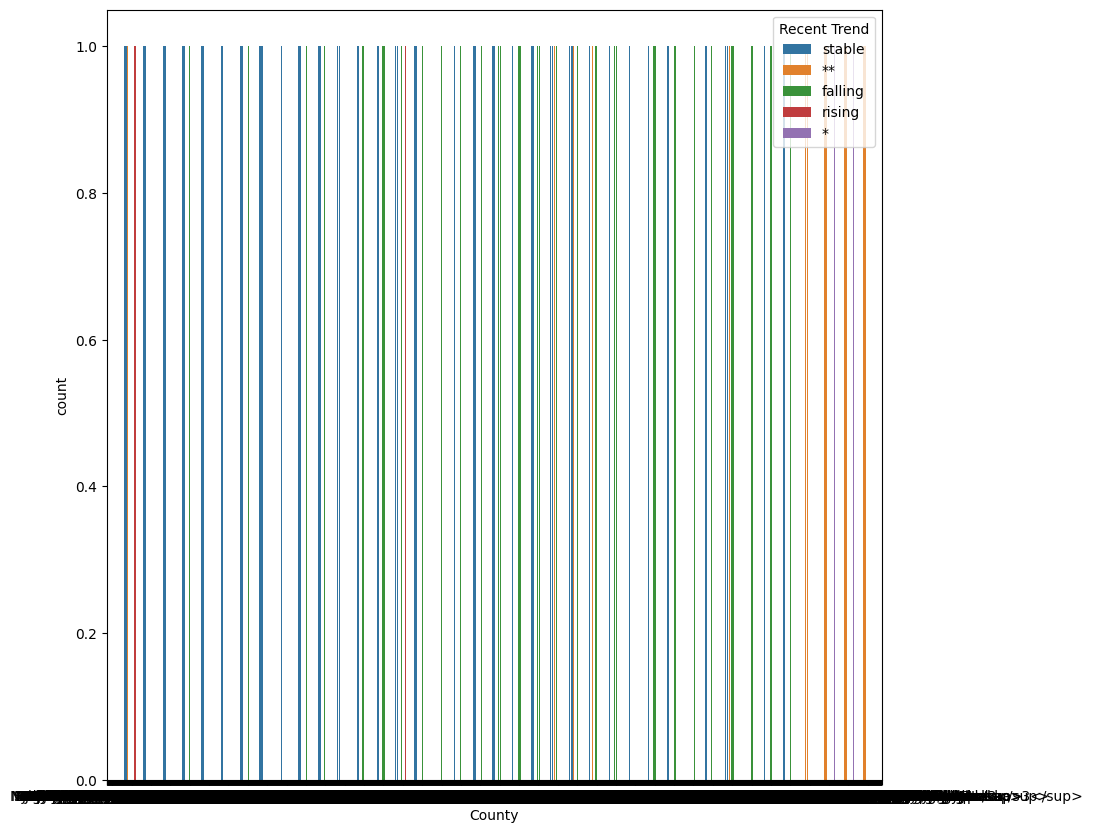

In [17]:
#CountPlot
plt.figure(figsize=(10,10))
sns.countplot(x=dr['County'],hue=dr['Recent Trend'])

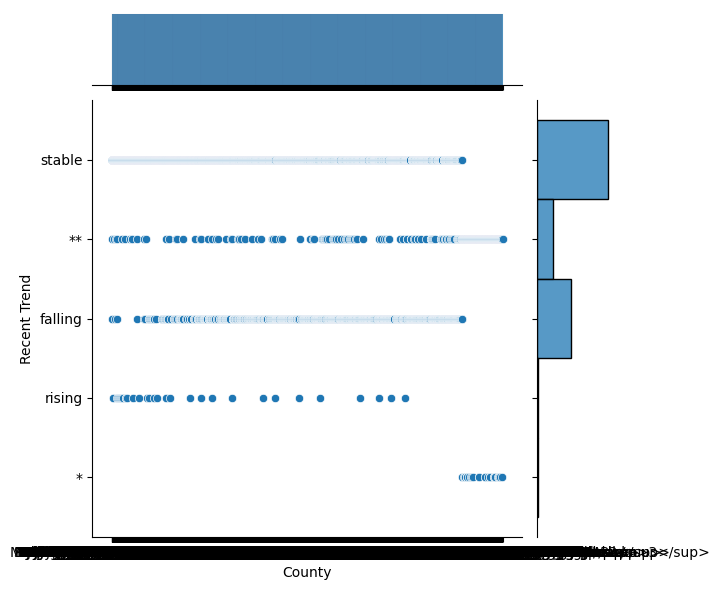

In [18]:
#JointPlot
sns.jointplot(x=dr['County'],y=dr['Recent Trend'])
plt.show()

<Axes: xlabel='County', ylabel='Recent Trend'>

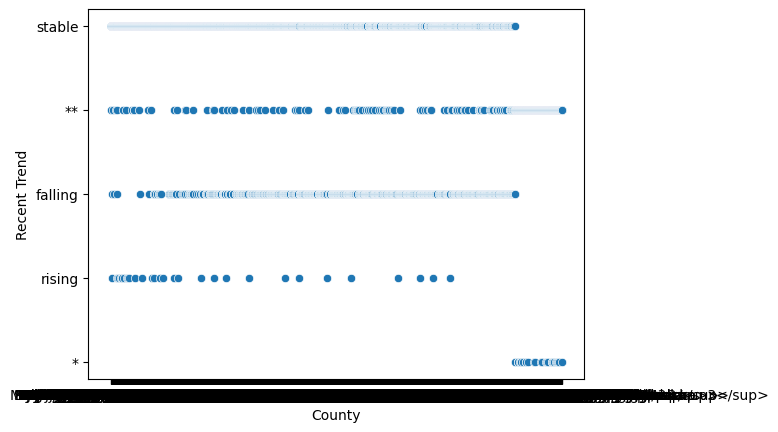

In [19]:
#ScatterPlot
sns.scatterplot(y=dr['Recent Trend'],x=dr['County'])

**MULTI-VARIATE ANALYSIS**

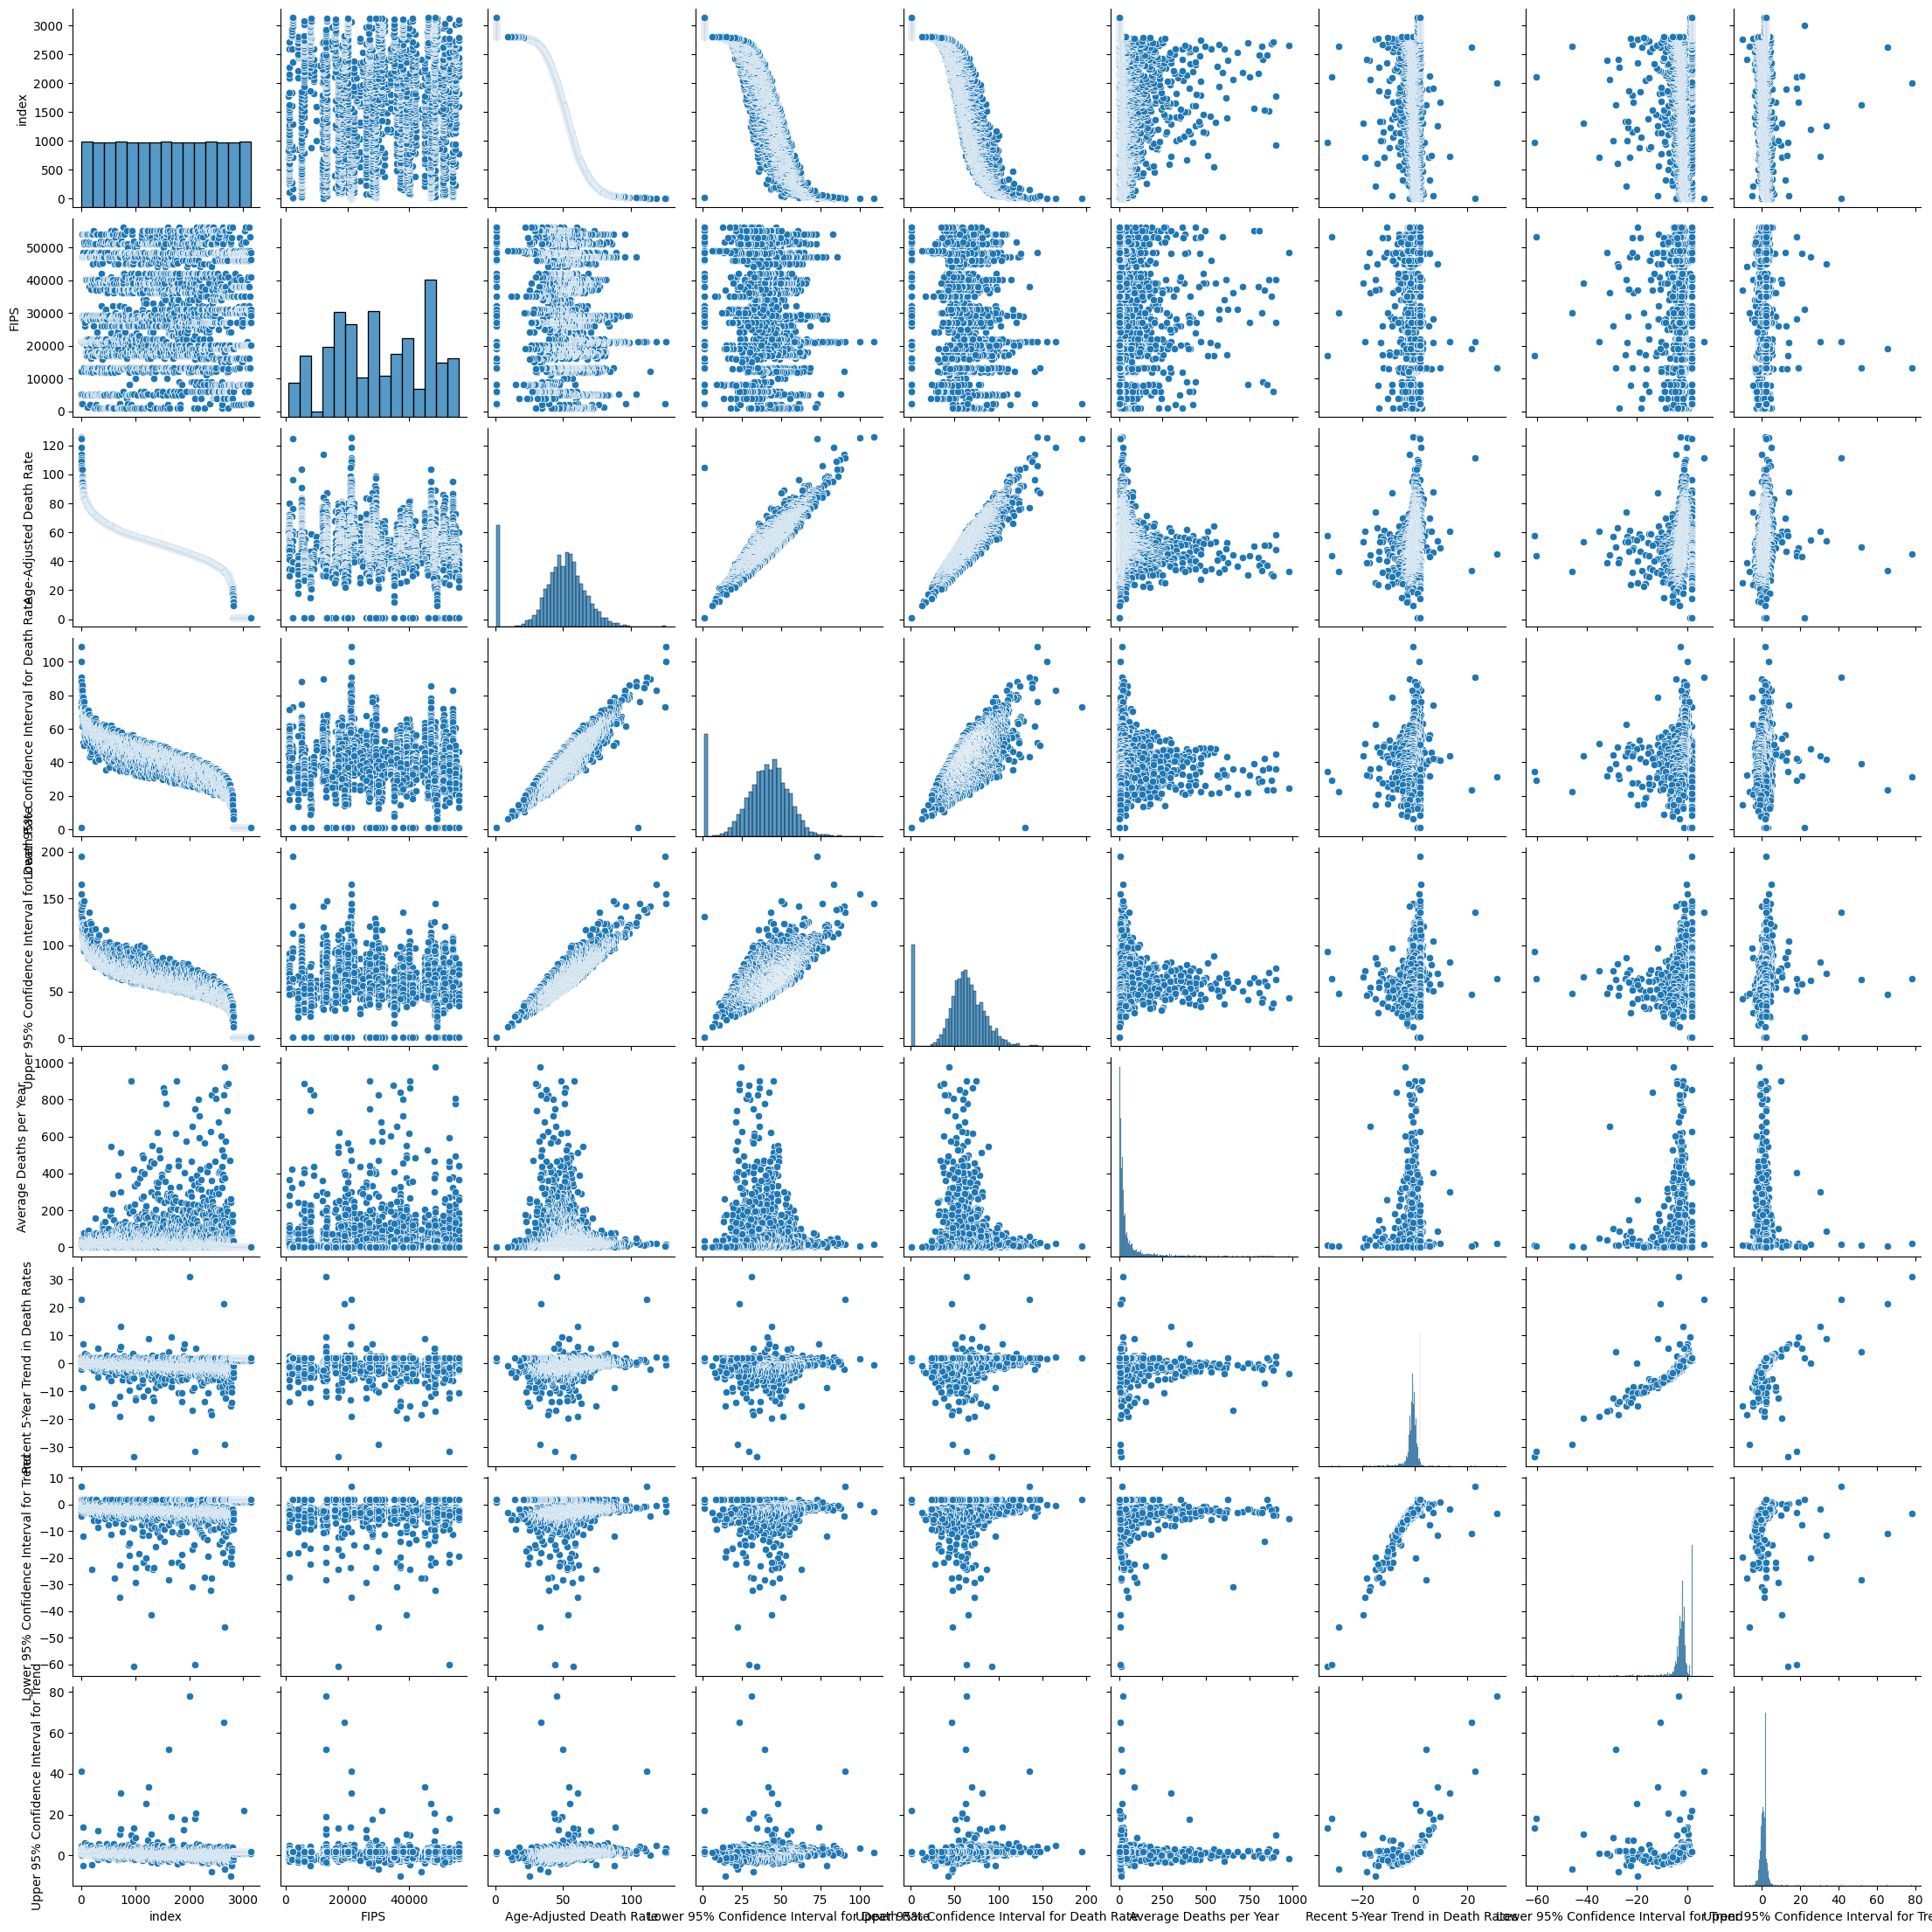

In [20]:
#PairPlot
sns.pairplot(dr)

<ipython-input-21-4c277b88f370>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dr.corr(),annot=True)


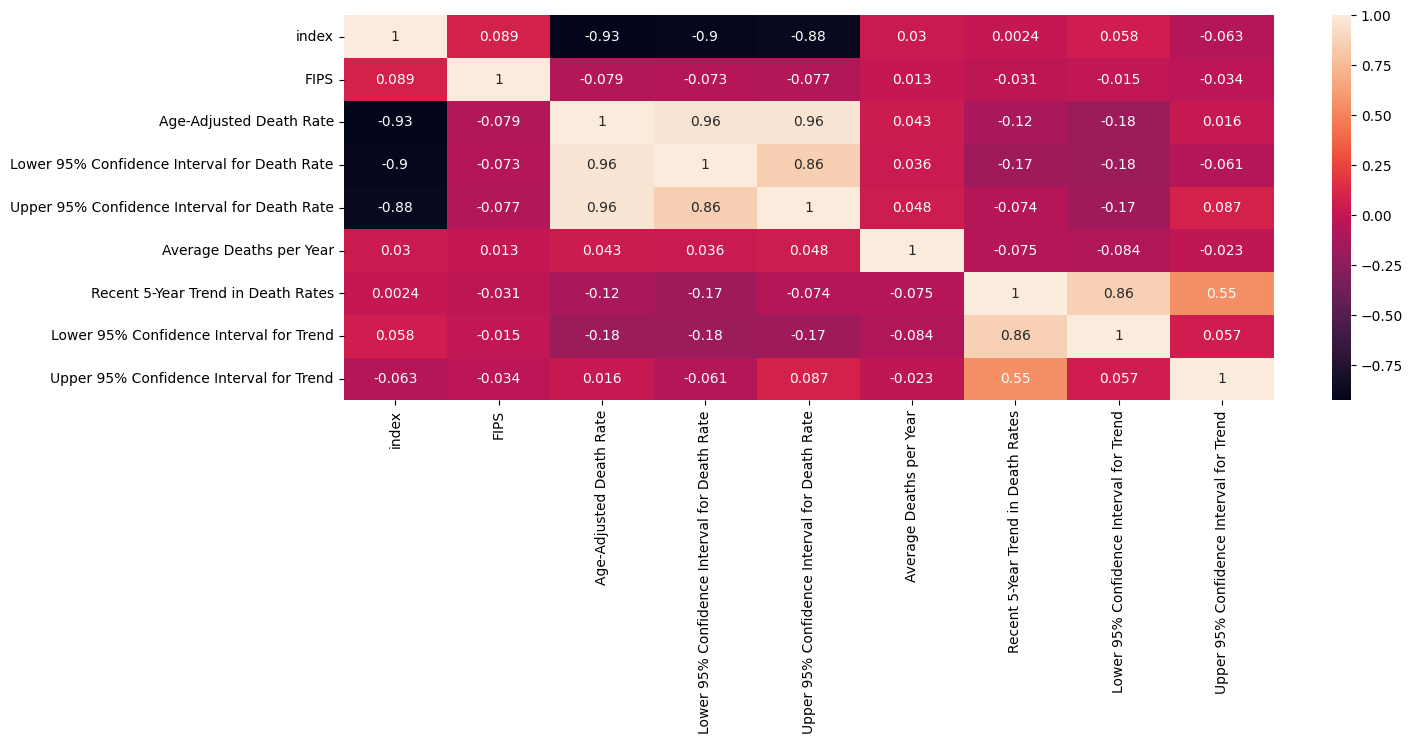

In [21]:
#Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(dr.corr(),annot=True)
plt.show()

# **3.PERFORM DESCRIPTIVE STATISTICS ON THE DATASET**

In [22]:
#Descriptive statistics of the dataset 
dr.describe()

,index,FIPS,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1570.500000,30401.960828,47.736242,38.402197,59.457962,47.357006,-0.584745,-2.087866,1.001242
std,906.584249,15150.904099,20.767306,17.341848,26.629216,95.138622,2.426678,3.588188,2.906804
min,1.000000,1001.000000,1.000000,1.000000,1.000000,1.000000,-33.400000,-60.900000,-10.300000
25%,785.750000,18180.500000,40.075000,30.500000,48.900000,8.000000,-1.400000,-2.800000,-0.100000
50%,1570.500000,29178.000000,50.600000,40.900000,61.900000,18.000000,-0.600000,-1.900000,0.900000
75%,2355.250000,45081.500000,59.900000,49.700000,75.100000,42.000000,0.500000,-1.000000,2.000000
max,3140.000000,56045.000000,125.600000,108.900000,194.700000,979.000000,31.100000,6.900000,78.100000


In [23]:
#To determine the mean, median, mode of the dataset
mean=dr.mean()
median=dr.median()
mode=dr.mode()
print(mean,median,mode)

index                                            1570.500000
FIPS                                            30401.960828
Age-Adjusted Death Rate                            47.736242
Lower 95% Confidence Interval for Death Rate       38.402197
Upper 95% Confidence Interval for Death Rate       59.457962
Average Deaths per Year                            47.357006
Recent 5-Year Trend in Death Rates                 -0.584745
Lower 95% Confidence Interval for Trend            -2.087866
Upper 95% Confidence Interval for Trend             1.001242
dtype: float64 index                                            1570.5
FIPS                                            29178.0
Age-Adjusted Death Rate                            50.6
Lower 95% Confidence Interval for Death Rate       40.9
Upper 95% Confidence Interval for Death Rate       61.9
Average Deaths per Year                            18.0
Recent 5-Year Trend in Death Rates                 -0.6
Lower 95% Confidence Interval for Trend     

<ipython-input-23-3c7b44088d9c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean=dr.mean()
<ipython-input-23-3c7b44088d9c>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median=dr.median()


In [24]:
#To determine the skewness of the dataset
dr.skew()

<ipython-input-24-2d0522635e24>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dr.skew()


index                                            0.000000
FIPS                                            -0.079261
Age-Adjusted Death Rate                         -0.701038
Lower 95% Confidence Interval for Death Rate    -0.613337
Upper 95% Confidence Interval for Death Rate    -0.510741
Average Deaths per Year                          4.954106
Recent 5-Year Trend in Death Rates              -2.144827
Lower 95% Confidence Interval for Trend         -6.158773
Upper 95% Confidence Interval for Trend         13.387949
dtype: float64

In [25]:
#To determine the kurtosis of the dataset
dr.kurtosis()

<ipython-input-25-9e7c1097a183>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dr.kurtosis()


index                                            -1.200000
FIPS                                             -1.098178
Age-Adjusted Death Rate                           0.818723
Lower 95% Confidence Interval for Death Rate      0.347448
Upper 95% Confidence Interval for Death Rate      0.901315
Average Deaths per Year                          31.029443
Recent 5-Year Trend in Death Rates               46.392913
Lower 95% Confidence Interval for Trend          70.220285
Upper 95% Confidence Interval for Trend         286.171349
dtype: float64

In [26]:
#Handling dataset and removing unnecessary columns
dr.drop(columns=['County'],inplace=True)

In [27]:
#Checking the dataset after removal of the columns
dr.head()

,index,FIPS,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,1,21193,125.6,108.9,144.2,18,stable,-0.6,-2.7,1.6
1,2,21197,125.3,100.2,155.1,5,stable,1.7,0.0,3.4
2,3,2185,124.9,73.0,194.7,8,**,2.0,2.0,2.0
3,4,21189,118.5,83.1,165.5,19,stable,2.2,-0.4,4.8
4,5,12125,113.5,89.9,141.4,22,falling,-2.2,-4.3,0.0


In [28]:
dr.shape

(3140, 10)

In [29]:
dr.columns

Index(['index', 'FIPS', 'Age-Adjusted Death Rate',
       'Lower 95% Confidence Interval for Death Rate',
       'Upper 95% Confidence Interval for Death Rate',
       'Average Deaths per Year', 'Recent Trend',
       'Recent 5-Year Trend in Death Rates',
       'Lower 95% Confidence Interval for Trend',
       'Upper 95% Confidence Interval for Trend'],
      dtype='object')

# **4.CHECK FOR MISSING VALUES AND DEAL WITH THEM**

In [30]:
#To determine null values in the dataset
dr.isnull()

,index,FIPS,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3135,False,False,False,False,False,False,False,False,False,False
3136,False,False,False,False,False,False,False,False,False,False
3137,False,False,False,False,False,False,False,False,False,False
3138,False,False,False,False,False,False,False,False,False,False


In [31]:
#To determine the count of null values of each column
dr.isnull().sum()

index                                           0
FIPS                                            0
Age-Adjusted Death Rate                         0
Lower 95% Confidence Interval for Death Rate    0
Upper 95% Confidence Interval for Death Rate    0
Average Deaths per Year                         0
Recent Trend                                    0
Recent 5-Year Trend in Death Rates              0
Lower 95% Confidence Interval for Trend         0
Upper 95% Confidence Interval for Trend         0
dtype: int64

In [32]:
#To display the total null value along with the percentage of null values in each column
total = dr.isnull().sum()
percent = (dr.isnull().sum())/(dr.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                                              Total  Percent
index                                             0      0.0
FIPS                                              0      0.0
Age-Adjusted Death Rate                           0      0.0
Lower 95% Confidence Interval for Death Rate      0      0.0
Upper 95% Confidence Interval for Death Rate      0      0.0
Average Deaths per Year                           0      0.0
Recent Trend                                      0      0.0
Recent 5-Year Trend in Death Rates                0      0.0
Lower 95% Confidence Interval for Trend           0      0.0
Upper 95% Confidence Interval for Trend           0      0.0


# **5.FIND THE OUTLIERS AND REPLACE THEM**

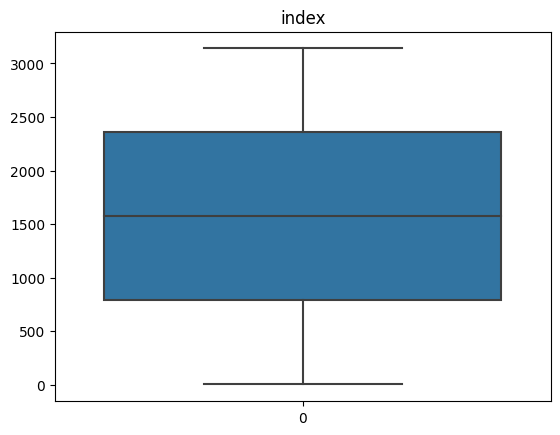

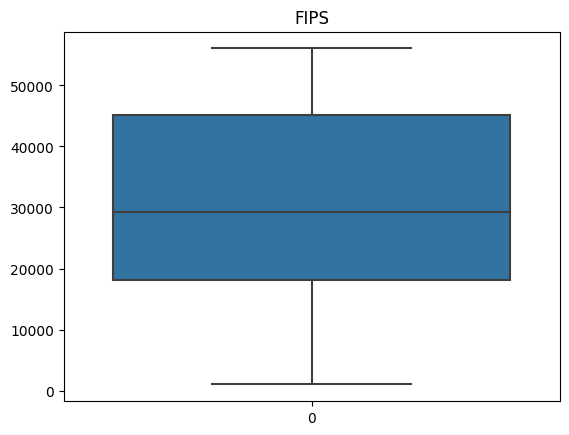

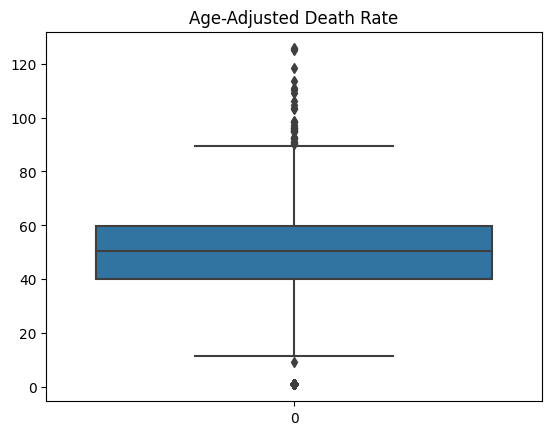

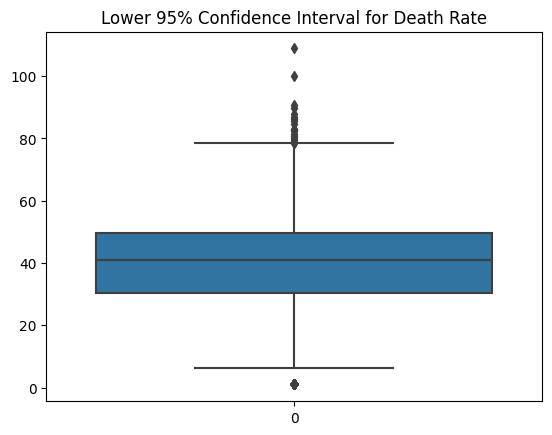

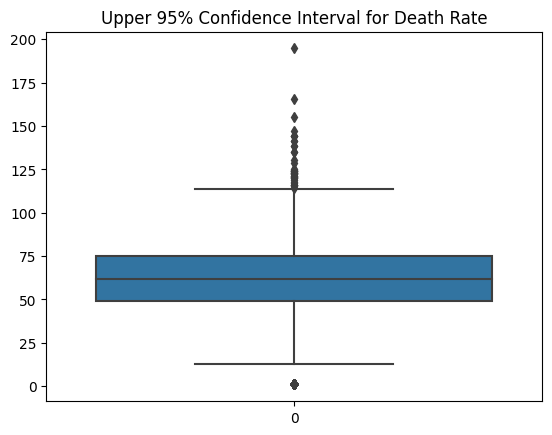

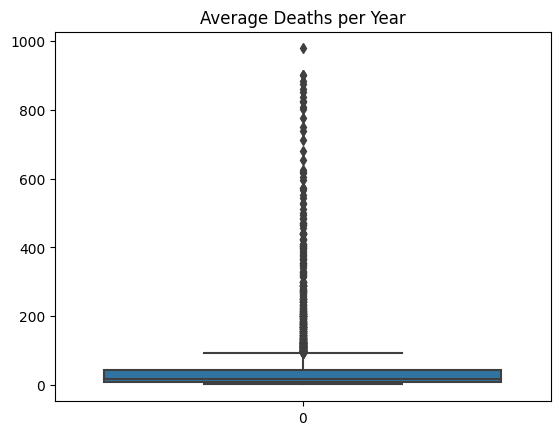

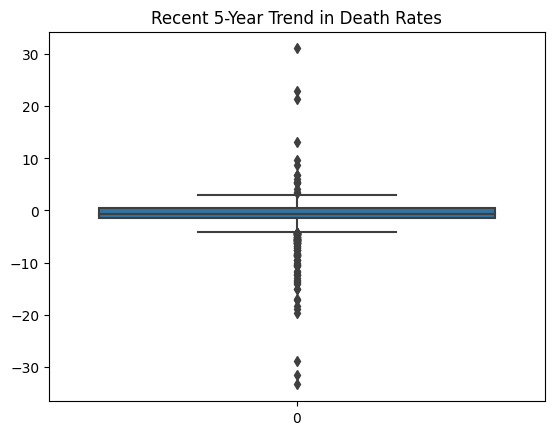

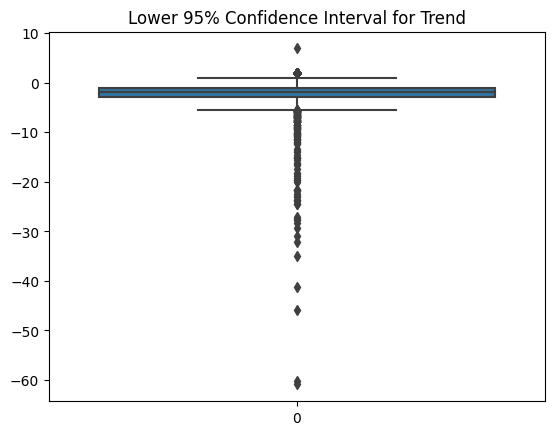

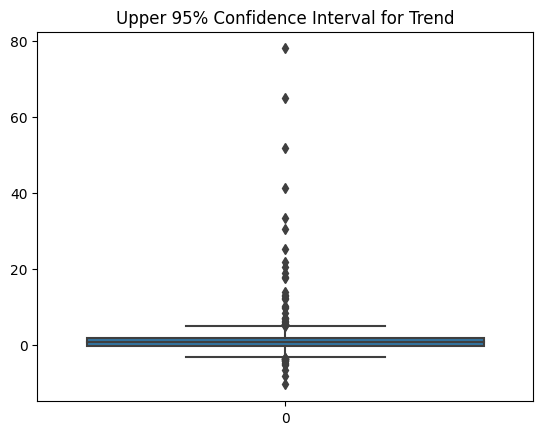

In [33]:
#Checking the outliers present using boxplot
for i in dr.columns:
    if type(dr[i][0])!=str:
        sns.boxplot(dr[i])
        plt.title(i)
        plt.show()

# **Removing outliers using IQR Method**

In [34]:
qnt=dr.quantile(q=(0.25,0.75))
qnt

<ipython-input-34-10d904e4d1bf>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  qnt=dr.quantile(q=(0.25,0.75))


,index,FIPS,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0.25,785.75,18180.5,40.075,30.5,48.9,8.0,-1.4,-2.8,-0.1
0.75,2355.25,45081.5,59.900,49.7,75.1,42.0,0.5,-1.0,2.0


In [35]:
iqr=qnt.loc[0.75]-qnt.loc[0.25]
iqr

index                                            1569.500
FIPS                                            26901.000
Age-Adjusted Death Rate                            19.825
Lower 95% Confidence Interval for Death Rate       19.200
Upper 95% Confidence Interval for Death Rate       26.200
Average Deaths per Year                            34.000
Recent 5-Year Trend in Death Rates                  1.900
Lower 95% Confidence Interval for Trend             1.800
Upper 95% Confidence Interval for Trend             2.100
dtype: float64

In [36]:
l=qnt.loc[0.25]-1.5*iqr
u=qnt.loc[0.75]+1.5*iqr
l,u

(index                                           -1568.5000
 FIPS                                           -22171.0000
 Age-Adjusted Death Rate                            10.3375
 Lower 95% Confidence Interval for Death Rate        1.7000
 Upper 95% Confidence Interval for Death Rate        9.6000
 Average Deaths per Year                           -43.0000
 Recent 5-Year Trend in Death Rates                 -4.2500
 Lower 95% Confidence Interval for Trend            -5.5000
 Upper 95% Confidence Interval for Trend            -3.2500
 dtype: float64,
 index                                            4709.5000
 FIPS                                            85433.0000
 Age-Adjusted Death Rate                            89.6375
 Lower 95% Confidence Interval for Death Rate       78.5000
 Upper 95% Confidence Interval for Death Rate      114.4000
 Average Deaths per Year                            93.0000
 Recent 5-Year Trend in Death Rates                  3.3500
 Lower 95% Confidence I

<Axes: ylabel='Age-Adjusted Death Rate'>

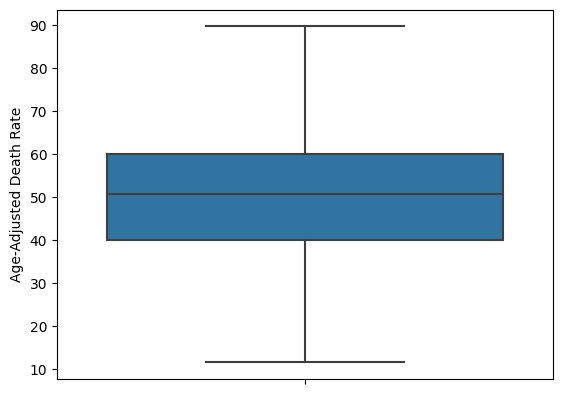

In [37]:
#Age-Adjusted Death Rate
dr['Age-Adjusted Death Rate']=np.where(dr['Age-Adjusted Death Rate']>89.6375,89.6375, 
                   np.where(dr['Age-Adjusted Death Rate']<10.3375,10.3375,dr['Age-Adjusted Death Rate']))
sns.boxplot(y='Age-Adjusted Death Rate',data=dr,showfliers=False)

<Axes: ylabel='Lower 95% Confidence Interval for Death Rate'>

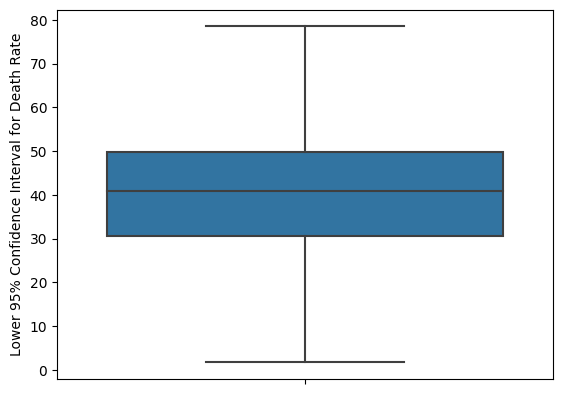

In [38]:
#Lower 95% Confidence Interval for Death Rate
dr['Lower 95% Confidence Interval for Death Rate']=np.where(dr['Lower 95% Confidence Interval for Death Rate']>78.5,78.5, 
                   np.where(dr['Lower 95% Confidence Interval for Death Rate']<1.7,1.7,dr['Lower 95% Confidence Interval for Death Rate']))
sns.boxplot(y='Lower 95% Confidence Interval for Death Rate',data=dr)

<Axes: ylabel='Upper 95% Confidence Interval for Death Rate'>

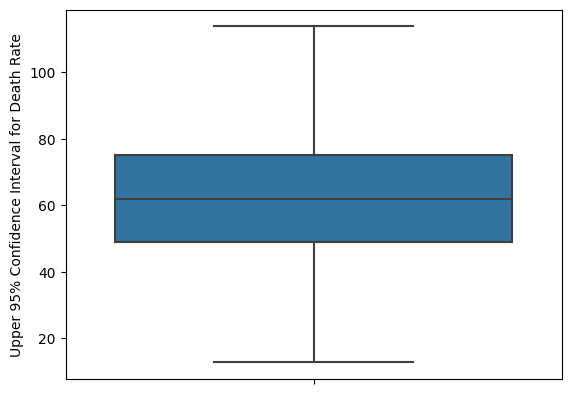

In [39]:
#Upper 95% Confidence Interval for Death Rate
dr['Upper 95% Confidence Interval for Death Rate']=np.where(dr['Upper 95% Confidence Interval for Death Rate']>114.4,114.4, 
                   np.where(dr['Upper 95% Confidence Interval for Death Rate']<9.6,9.6,dr['Upper 95% Confidence Interval for Death Rate']))
sns.boxplot(y='Upper 95% Confidence Interval for Death Rate',data=dr,showfliers=False)

<Axes: ylabel='Upper 95% Confidence Interval for Trend'>

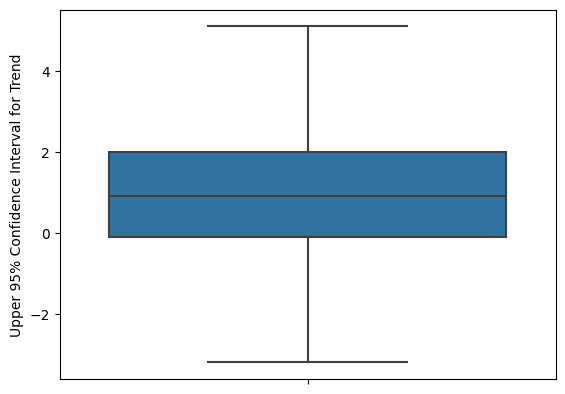

In [40]:
#Lower 95% Confidence Interval for Trend   
dr['Lower 95% Confidence Interval for Trend']=np.where(dr['Lower 95% Confidence Interval for Trend']> 1.7,1.7, 
                   np.where(dr['Lower 95% Confidence Interval for Trend']< -5.5,-5.5,dr['Lower 95% Confidence Interval for Trend']))
sns.boxplot(y='Upper 95% Confidence Interval for Trend',data=dr,showfliers=False)

<Axes: ylabel='Upper 95% Confidence Interval for Trend'>

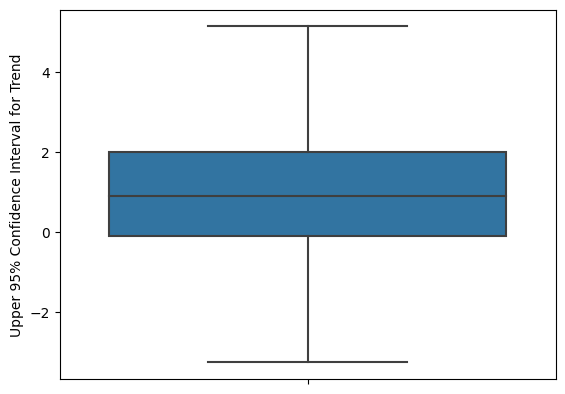

In [41]:
#Upper 95% Confidence Interval for Trend  
dr['Upper 95% Confidence Interval for Trend']=np.where(dr['Upper 95% Confidence Interval for Trend']> 5.15,5.15,
                   np.where(dr['Upper 95% Confidence Interval for Trend']< -3.25,-3.25,dr['Upper 95% Confidence Interval for Trend']))
sns.boxplot(y='Upper 95% Confidence Interval for Trend',data=dr
            )

<Axes: ylabel='Recent 5-Year Trend in Death Rates'>

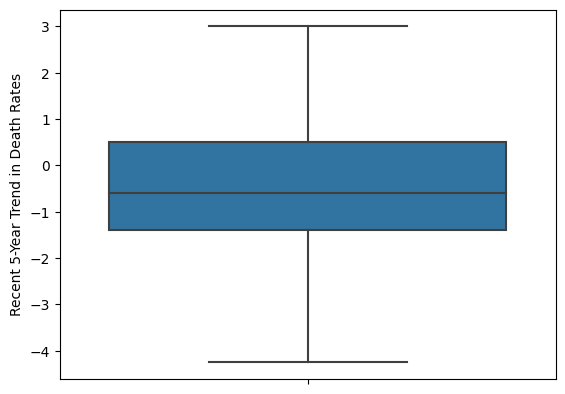

In [42]:
#Recent 5-Year Trend in Death Rates 
dr['Recent 5-Year Trend in Death Rates']=np.where(dr['Recent 5-Year Trend in Death Rates']> 3.35,3.35,
                   np.where(dr['Recent 5-Year Trend in Death Rates']< -4.25,-4.25,dr['Recent 5-Year Trend in Death Rates']))
sns.boxplot(y='Recent 5-Year Trend in Death Rates',data=dr,showfliers=False
            )

<Axes: ylabel='Average Deaths per Year'>

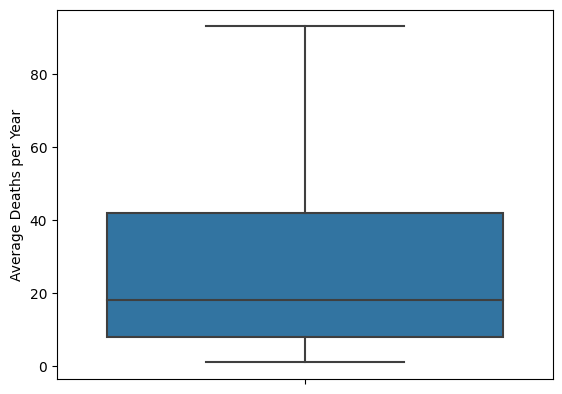

In [43]:
#Average Deaths per Year
dr['Average Deaths per Year']=np.where(dr['Average Deaths per Year']> 93.0000,93.0000,
                   np.where(dr['Average Deaths per Year']< -43.0000,-43.0000,dr['Average Deaths per Year']))
sns.boxplot(y='Average Deaths per Year',data=dr,showfliers=False
            )

# **6.CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING**

In [44]:
#displaying only the categorical columns
dr1=dr.select_dtypes(include=['object'])
dr1

,Recent Trend
0,stable
1,stable
2,**
3,stable
4,falling
...,...
3135,**
3136,**
3137,*
3138,**


In [45]:
dr['Recent Trend'].unique()

array(['stable', '**', 'falling', 'rising', '*'], dtype=object)

In [46]:
#Label Encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dr['Recent Trend'].replace({"*":1,"**":2,"stable":5,"falling":6,"rising":7},inplace=True)

In [47]:
#displaying all columns after label encoding
dr.select_dtypes(include=['object'])
dr

,index,FIPS,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,1,21193,89.6375,78.5,114.4,18.0,5,-0.6,-2.7,1.6
1,2,21197,89.6375,78.5,114.4,5.0,5,1.7,0.0,3.4
2,3,2185,89.6375,73.0,114.4,8.0,2,2.0,1.7,2.0
3,4,21189,89.6375,78.5,114.4,19.0,5,2.2,-0.4,4.8
4,5,12125,89.6375,78.5,114.4,22.0,6,-2.2,-4.3,0.0
...,...,...,...,...,...,...,...,...,...,...
3135,3136,2282,10.3375,1.7,9.6,1.0,2,2.0,1.7,2.0
3136,3137,2290,10.3375,1.7,9.6,1.0,2,2.0,1.7,2.0
3137,3138,48505,10.3375,1.7,9.6,1.0,1,1.0,1.0,1.0
3138,3139,48507,10.3375,1.7,9.6,1.0,2,2.0,1.7,2.0


# **7.SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [48]:
#Spliting dependent and independent variable
x_train, x_test, y_train, y_test = train_test_split(
                                        dr.drop(columns=['Recent Trend']),
                                        dr['Recent Trend'],
                                        random_state=1234,test_size = 0.20,
                                        shuffle=True
                                        )
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2512, 9)
(628, 9)
(2512,)
(628,)


In [49]:
x_train.head()

,index,FIPS,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent 5-Year Trend in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
516,517,5101,64.9,47.0,89.1,13.0,-1.2,-3.7,1.3
638,639,21047,62.4,53.8,71.9,77.0,-1.6,-2.4,-0.7
1997,1998,19069,45.3,31.5,64.0,7.0,1.9,0.1,3.8
2342,2343,26111,40.3,35.0,46.2,13.0,-1.3,-2.5,-0.2
582,583,47071,63.6,52.6,76.5,10.0,0.7,-1.0,2.5


# **8.NORMALISING THE DATA**

In [50]:
from sklearn.preprocessing import Normalizer
Data_normalizer = Normalizer(norm='l1').fit(x_train)
x_train_normalized = Data_normalizer.transform(x_train)
x_test_normalized = Data_normalizer.transform(x_test)

# **9.BUILDING THE MODEL**

**10.TRAINING THE MODEL**

**11.TESTING THE MODEL**

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [52]:
def models_eval_mm(x_train,y_train,x_test,y_test):
   
    print('--XGBoost')
    xgb = XGBClassifier(n_estimators=300,n_jobs=-1,random_state=1234) 
    y_train=le.fit_transform(y_train)
    xgb.fit(x_train,y_train)
    print('Train Score:',xgb.score(x_train,y_train))
    print('Test Score:',xgb.score(x_test,y_test))
    y_train = le.inverse_transform(y_train)
    print()
    
    print('--KNN')
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    print('Train Score:',knn.score(x_train,y_train))
    print('Test Score:',knn.score(x_test,y_test))
    print()
    
    print('--Random Forest')
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train,y_train)
    print('Train Score:',rf.score(x_train,y_train))
    print('Test Score:',rf.score(x_test,y_test))
    print()

    print('--SVM classifier')
    svc = svm.SVC(random_state=1234,kernel='rbf',C= 10, gamma= 5 , tol = 1e-2,verbose = 1)
    svc.fit(x_train,y_train)
    print('Train Score:',svc.score(x_train,y_train))
    print('Test Score:',svc.score(x_test,y_test))
    print()

    print('--Naive Bayes')
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    print('Train Score:',gnb.score(x_train,y_train))
    print('Test Score:',gnb.score(x_test,y_test))
    print()

    print('--Decision Tree')
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    print('Train Score:',dt.score(x_train,y_train))
    print('Test Score:',dt.score(x_test,y_test))
    print()

    return xgb,knn,rf,svc,gnb,dt

In [53]:
xgb,knn,rf,svc,gnb,dt = models_eval_mm(x_train_normalized,y_train,x_test_normalized,y_test)

--XGBoost
Train Score: 1.0
Test Score: 0.0031847133757961785

--KNN
Train Score: 0.7718949044585988
Test Score: 0.6878980891719745

--Random Forest
Train Score: 1.0
Test Score: 0.9872611464968153

--SVM classifier
[LibSVM]Train Score: 0.5967356687898089
Test Score: 0.5971337579617835

--Naive Bayes
Train Score: 0.6648089171974523
Test Score: 0.6751592356687898

--Decision Tree
Train Score: 1.0
Test Score: 0.9888535031847133



# **HYPERPARAMETER TUNING FOR RANDOM FOREST**

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 500,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_cv = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_cv)

{'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [56]:
randomcv_rf=RandomizedSearchCV(estimator=rf,param_distributions=random_cv,n_iter=100,cv=3)

In [57]:
randomcv_rf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336, 391, 445, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200]})

In [58]:
best_random_cv=randomcv_rf.best_estimator_

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
y_pred=best_random_cv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[  5   0   0   0   0]
 [  0  77   0   0   0]
 [  0   0 352   5   0]
 [  0   0   1 183   0]
 [  0   0   1   0   4]]
Accuracy Score 0.9888535031847133
Classification report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        77
           5       0.99      0.99      0.99       357
           6       0.97      0.99      0.98       184
           7       1.00      0.80      0.89         5

    accuracy                           0.99       628
   macro avg       0.99      0.96      0.97       628
weighted avg       0.99      0.99      0.99       628



# **12.COMPARING THE MODELS**

In [61]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
def eval(name,model):
    y_pred = model.predict(x_test_normalized)
    result =[]
    result.append(name)
    result.append("{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(f1_score(y_test, y_pred, average='micro') * 100))
    result.append("{:.2f}".format(recall_score(y_test, y_pred,average='micro') * 100))
    result.append("{:.2f}".format(precision_score(y_test, y_pred,average='micro') * 100))
    return result

In [62]:
model_list = {
    'XGBoost':xgb,
    'KNN':knn,
    'Random Forest':rf,
    'Support Vector Classifier':svc,
    'Naive Bayes':gnb,
    'Decision Tree':dt
}

In [63]:
model_eval_info = []
for i in model_list.keys():
    model_eval_info.append(eval(i,model_list[i]))
model_eval_info = pd.DataFrame(model_eval_info,columns=['Name','Accuracy','f1_score','Recall','Precision'])
model_eval_info.to_csv('model_eval.csv')
model_eval_info

,Name,Accuracy,f1_score,Recall,Precision
0,XGBoost,0.32,0.32,0.32,0.32
1,KNN,68.79,68.79,68.79,68.79
2,Random Forest,98.73,98.73,98.73,98.73
3,Support Vector Classifier,59.71,59.71,59.71,59.71
4,Naive Bayes,67.52,67.52,67.52,67.52
5,Decision Tree,98.89,98.89,98.89,98.89


In [64]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('model_eval.csv')
df

,Unnamed: 0,Name,Accuracy,f1_score,Recall,Precision
0,0,XGBoost,0.32,0.32,0.32,0.32
1,1,KNN,68.79,68.79,68.79,68.79
2,2,Random Forest,98.73,98.73,98.73,98.73
3,3,Support Vector Classifier,59.71,59.71,59.71,59.71
4,4,Naive Bayes,67.52,67.52,67.52,67.52
5,5,Decision Tree,98.89,98.89,98.89,98.89


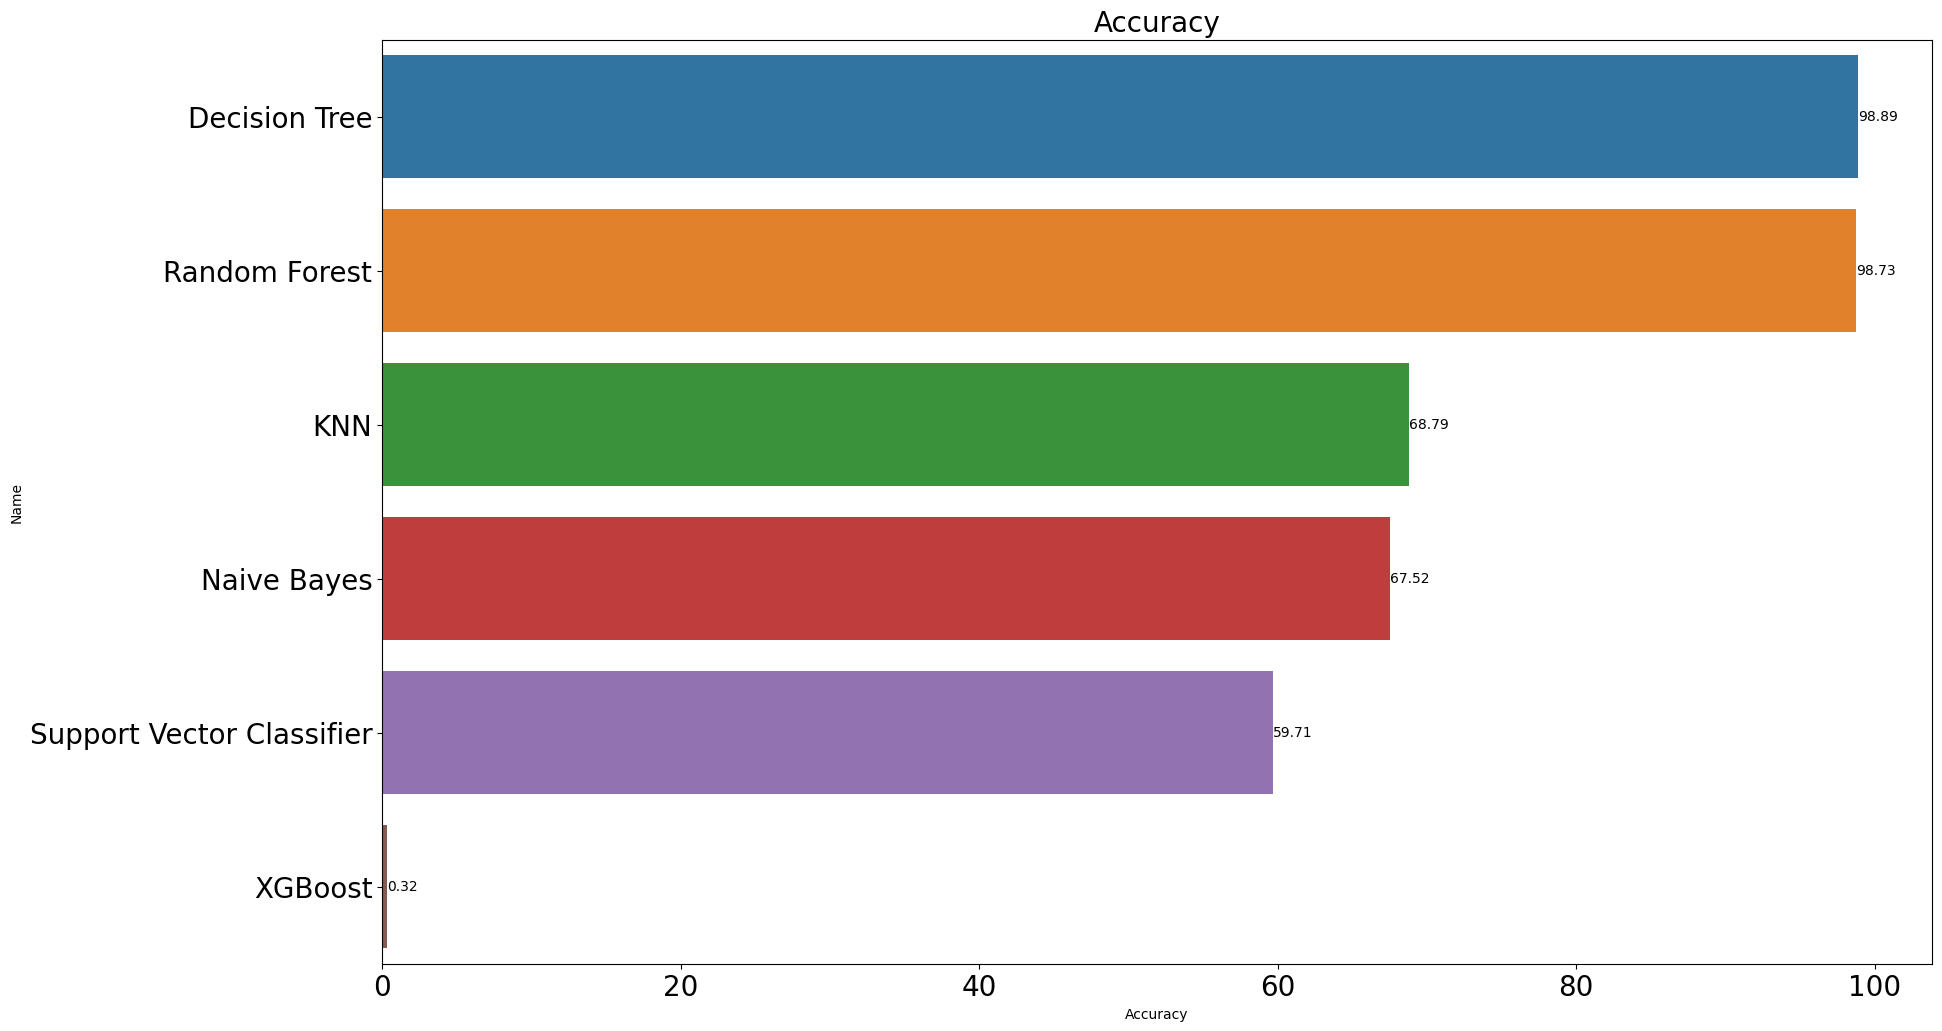

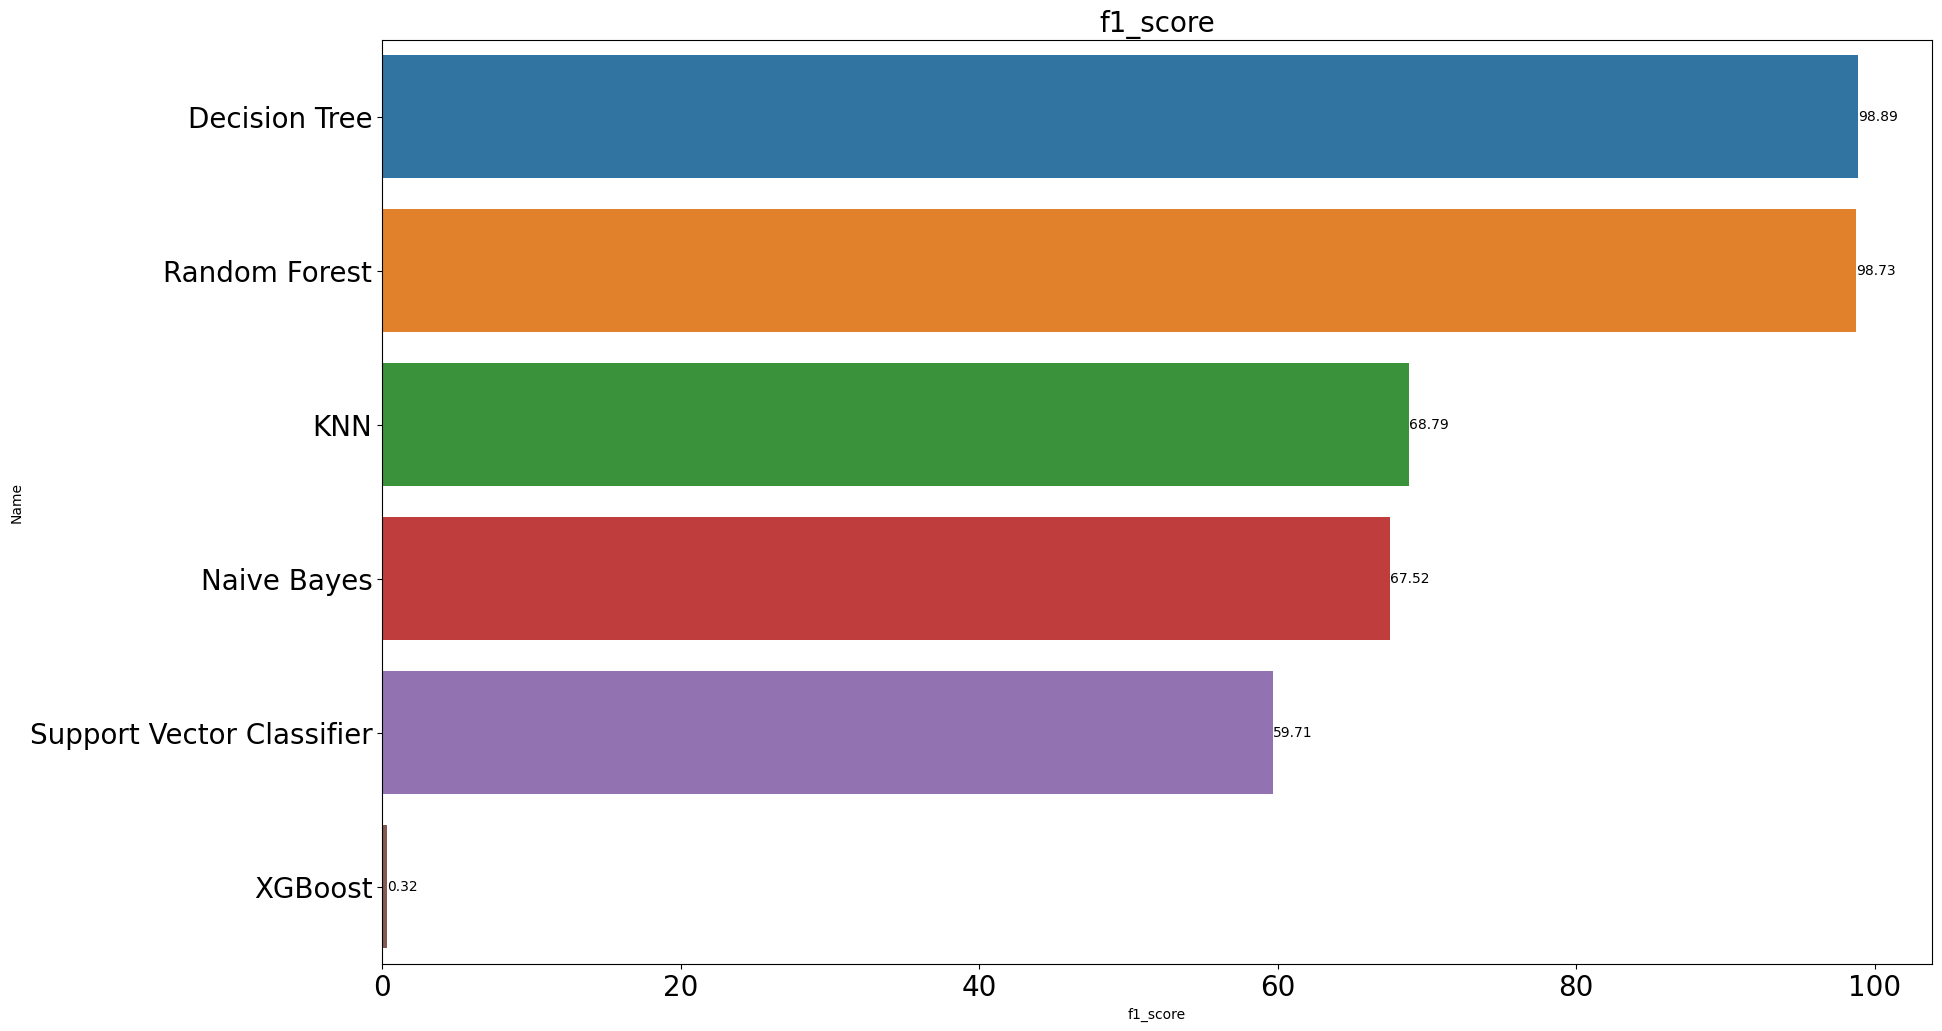

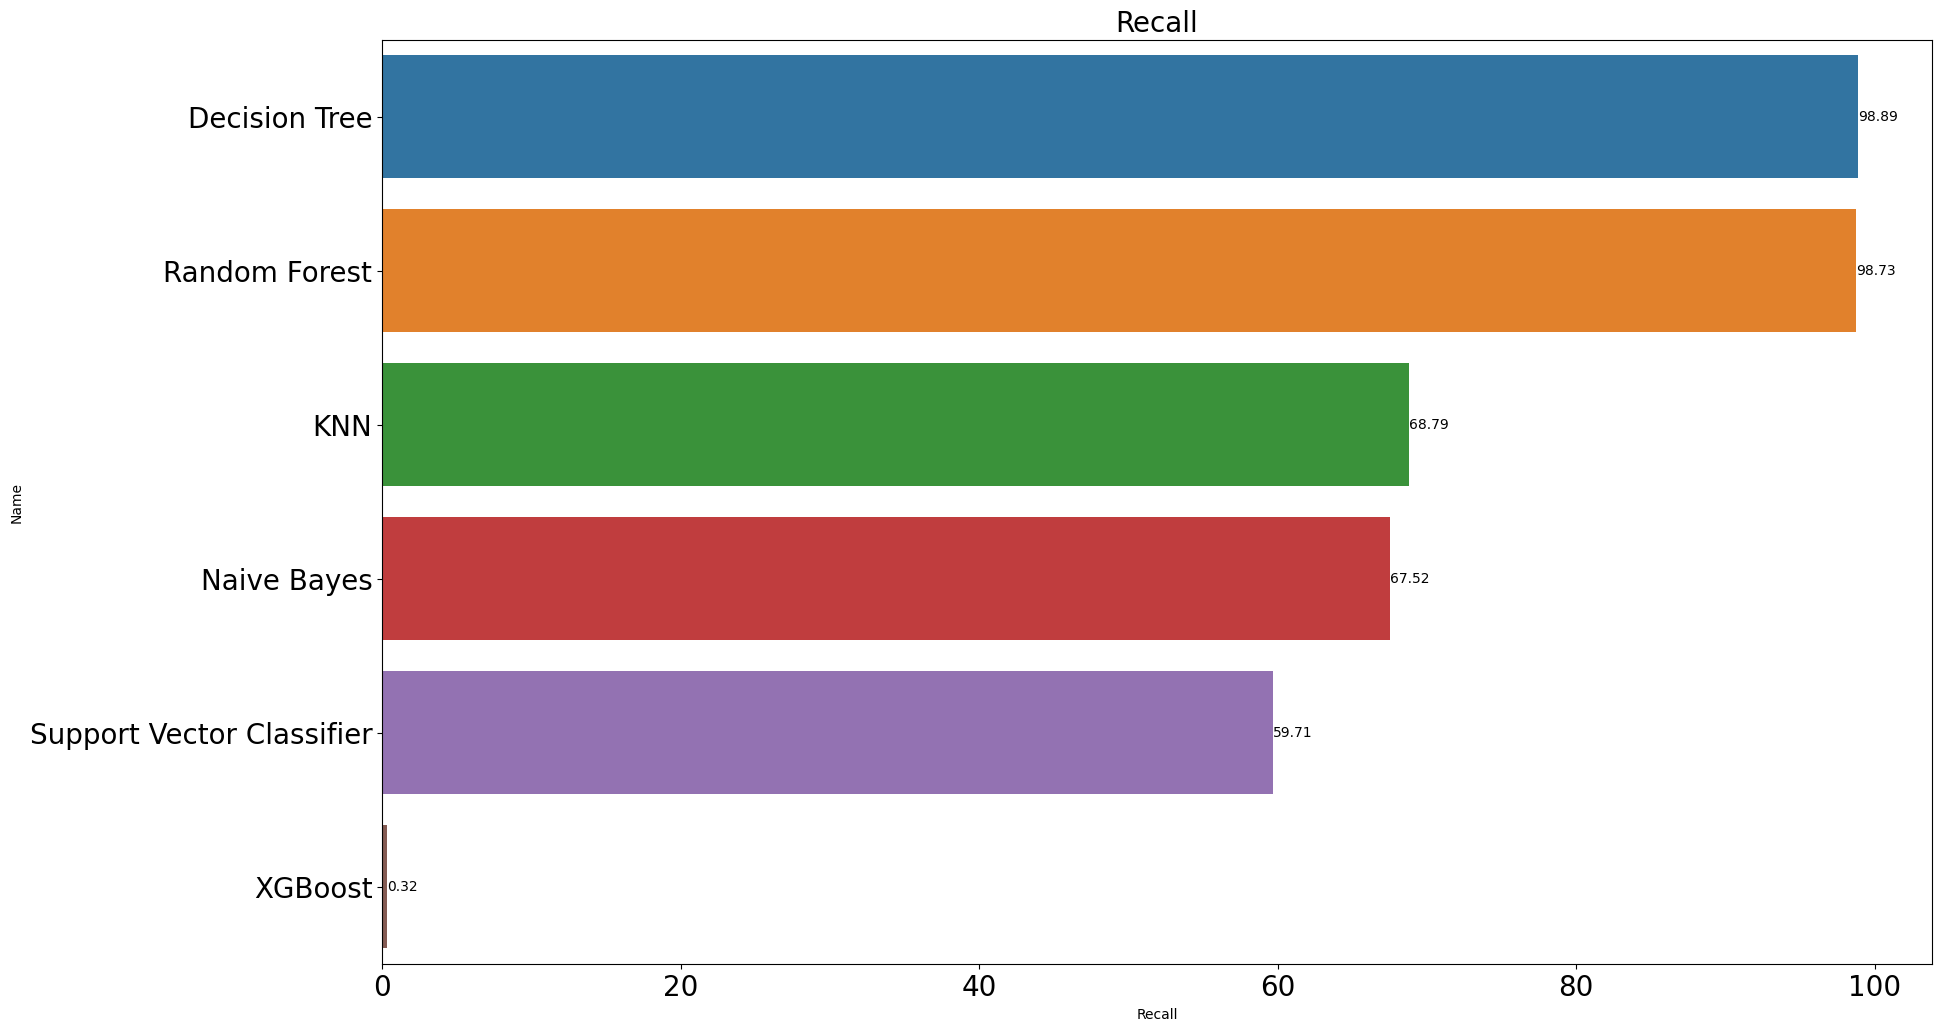

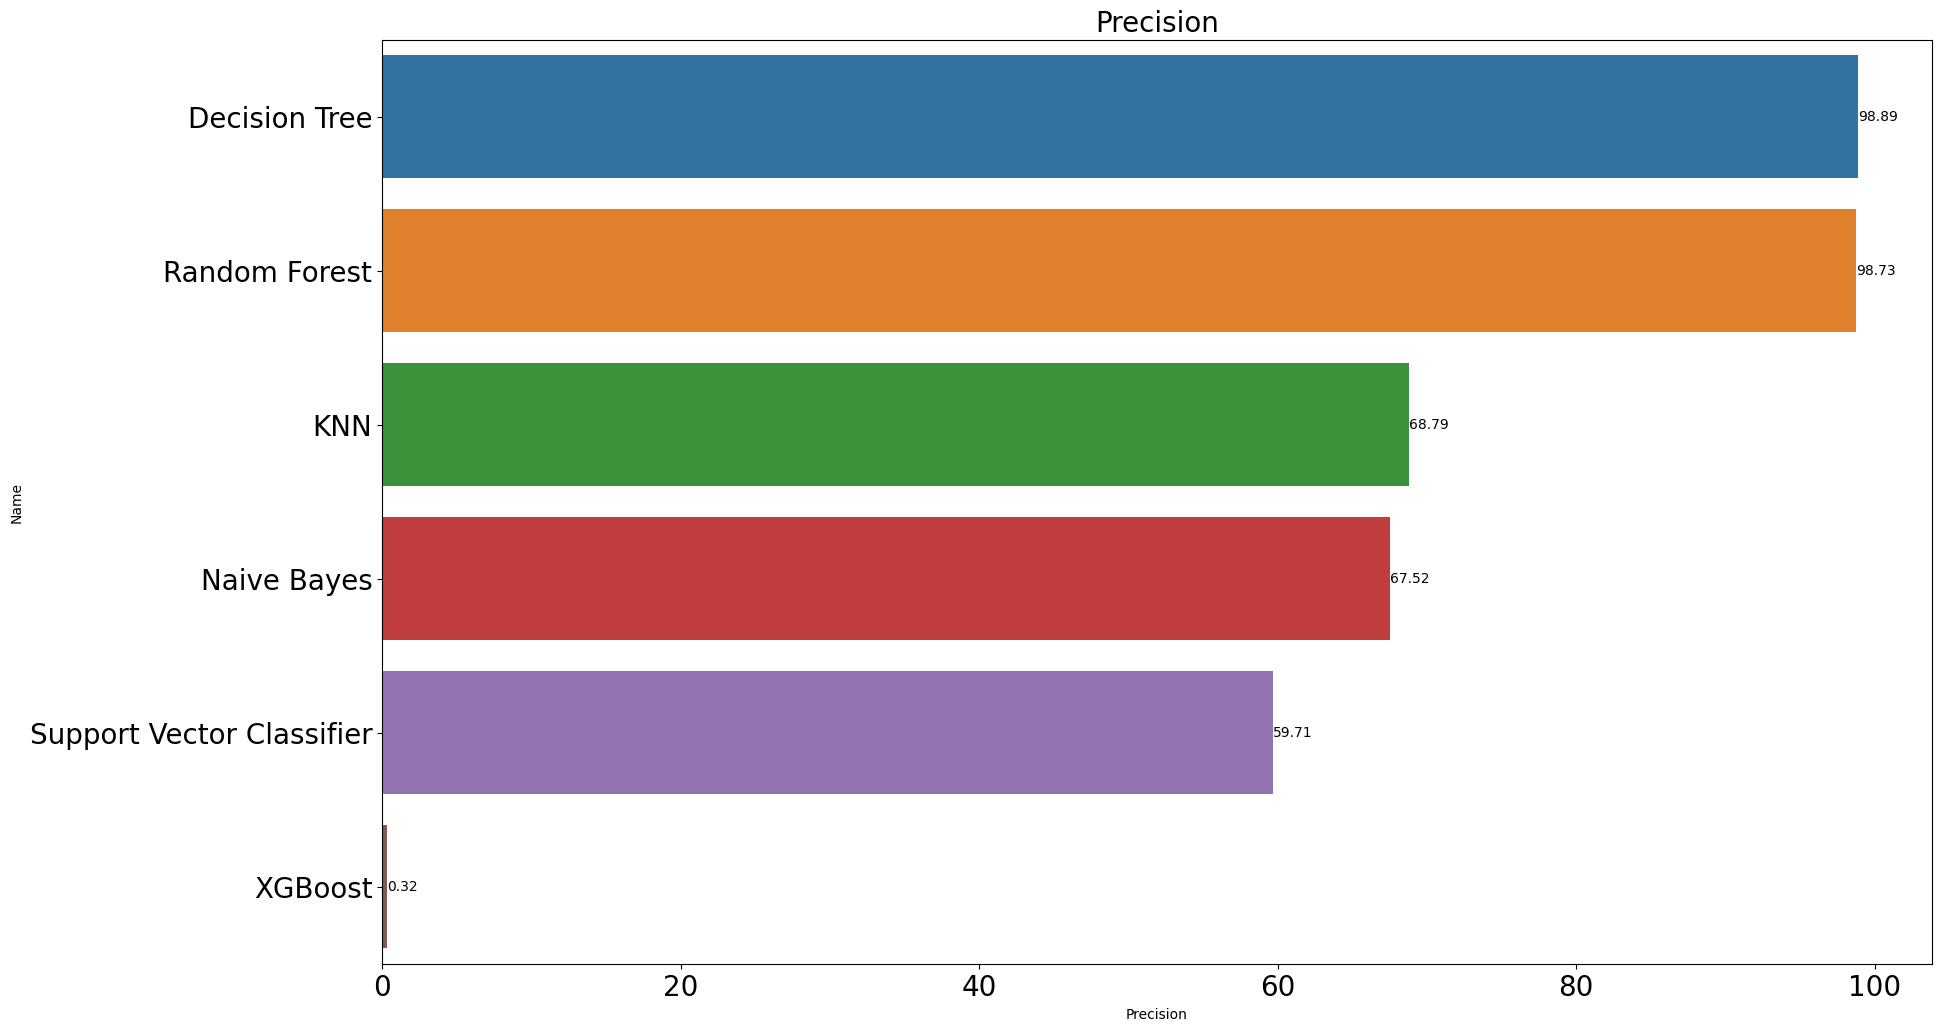

In [65]:
for i in df.columns[2:]:
    plt.figure(figsize=(20, 12))
    plt.title(i,fontsize=20)
    b=sns.barplot(y='Name',x=i,data=df,order=df.sort_values(i,ascending = False).Name)
    b.tick_params(labelsize=20)
    b.bar_label(b.containers[0])
    plt.show()

# **13 SAVING THE BEST MODEL**

In [66]:
import pickle as pkl

In [67]:
pkl.dump(rf, open('dt_acc_68.pkl', 'wb'))

# **14.LOAD THE BEST MODEL**

In [68]:
model = pkl.load(open('dt_acc_68.pkl', 'rb'))

# **15 TESTING THE SAVED MODEL BY GIVING RANDOM VALUES**

In [69]:
a=model.predict([[3.3,253,0,11,0,3.7,0,0,0]])
pickle=int(a)
pickle

5

In [70]:
b=model.predict([[1,2,3,4,1,0,7.1,3,1]])
pickle=int(b)
pickle

7

In [71]:
c=model.predict([[131312,45,43,145,12354,456,3325,245,745]])
pickle=int(c)
pickle

7

In [72]:
d=model.predict([[-234,-3413,2443,-345.41324,3243,23411,6784,643,-12580382]])
pickle=int(d)
pickle

6

In [73]:
e=model.predict([[3.3,253,0,11,0,3.7,0,0,0]])
pickle=int(e)
pickle

5

In [74]:
f=model.predict([[3.3,253,0,11,0,3.7,0,0,0]])
pickle=int(f)
pickle

5